In [33]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
x = df.drop('math score', axis=1)
y = df['math score']

In [38]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [39]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [40]:
## Create column transformer for cat variables
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_features = x.select_dtypes(include=['object']).columns
num_features = x.select_dtypes(exclude=['object']).columns

oh_transformer = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features)
        , ("StandardScaler", scaler, num_features)
    ]
)

In [41]:
x = preprocessor.fit_transform(x)

In [42]:
x.shape

(1000, 19)

In [43]:
## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 19), (300, 19), (700,), (300,))

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(true,pred):
    print("Mean Absolute Error:", mean_absolute_error(true, pred))
    print("Mean Squared Error:", mean_squared_error(true, pred))
    print("R2 Score:", r2_score(true, pred))

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0)
}

model_performance = {}

In [48]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print(f"Model: {list(models.keys())[i]}")
    evaluate_model(y_test, y_pred)
    model_performance[list(models.keys())[i]] = {
        "R2": r2_score(y_test, y_pred)
    }

Model: Linear Regression
Mean Absolute Error: 4.418261320297315
Mean Squared Error: 30.886593188073082
R2 Score: 0.8758630443016734
Model: Ridge Regression
Mean Absolute Error: 4.415505801902555
Mean Squared Error: 30.875711669044314
R2 Score: 0.8759067784434539
Model: Lasso Regression
Mean Absolute Error: 5.392913577222256
Mean Squared Error: 47.20410059865967
R2 Score: 0.8102810073900306
Model: Support Vector Regressor
Mean Absolute Error: 5.728331056674931
Mean Squared Error: 67.9632245532446
R2 Score: 0.7268475760952678
Model: Decision Tree Regressor
Mean Absolute Error: 6.443333333333333
Mean Squared Error: 66.73
R2 Score: 0.7318040548108075
Model: Random Forest Regressor
Mean Absolute Error: 4.880936111111111
Mean Squared Error: 38.446435650462966
R2 Score: 0.8454791226070526
Model: K-Neighbors Regressor
Mean Absolute Error: 5.8373333333333335
Mean Squared Error: 56.6472
R2 Score: 0.7723280481594301
Model: AdaBoost Regressor
Mean Absolute Error: 5.049884444943707
Mean Squared Err

In [52]:
## Results
model_performance_df = pd.DataFrame(model_performance)
model_performance_df.T.sort_values(by='R2',ascending=False)

,R2
Ridge Regression,0.875907
Linear Regression,0.875863
Gradient Boosting Regressor,0.865229
CatBoost Regressor,0.852108
Random Forest Regressor,0.845479
AdaBoost Regressor,0.832181
XGBoost Regressor,0.811816
Lasso Regression,0.810281
K-Neighbors Regressor,0.772328
Decision Tree Regressor,0.731804


In [53]:
## Linear Regression
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)
print(f"R2 Score: {score}")

R2 Score: 0.8758630443016734


<Axes: xlabel='math score'>

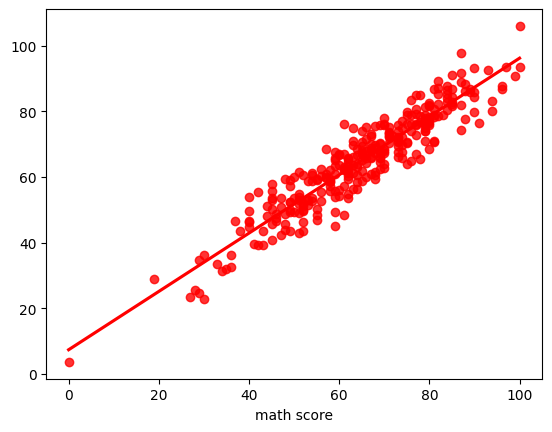

In [56]:
## Plotting
sns.regplot(x=y_test, y=y_pred, color='red',ci=None)